## Installation

### Python modules

All the Python scripts built to produce the published results are available publicly on Gitlab. The repository can be cloned as follows:

In [ ]:
!git clone https://gitlab.com/astroquasar/publications/2017_dumont

Cloning into '2017_dumont'...
remote: Enumerating objects: 2972, done.
remote: Counting objects: 100% (2972/2972), done.
remote: Compressing objects: 100% (895/895), done.
remote: Total 9227 (delta 1770), reused 2828 (delta 1634)
Receiving objects: 100% (9227/9227), 74.77 MiB | 29.30 MiB/s, done.
Resolving deltas: 100% (4998/4998), done.


The rest of the study will be done within the cloned repository.

In [ ]:
import os
os.chdir('2017_dumont')

### VPFIT version 10.0

In this work, we used VPFIT 10.0 to run the Voigt profile fits, a copy of this version can be found in the Gitlab repository. Before compiling the program, we need to install two dependent libraries, PGPLOT and CFITSIO. For PGPLOT, we will used the package release `pgplot5` available from the apt-get package manager:

In [ ]:
%%capture
!apt-get install pgplot5

Regarding the CFITSIO library, we will use a working version from the healpy [Github repository](https://github.com/healpy), which can be installed as follows:

In [ ]:
%%capture
!git clone https://github.com/healpy/cfitsio.git && cd cfitsio && ./configure --prefix=/usr && make &&  make install && ./

Finally, the VPFIT program can be compiled by running the makefile, which was slightly modified to reflect the location were all the libraries can be found:

In [ ]:
%%capture
!cd vpfit10.0 && make vpcolab

The `alphaqso` library will also be used to create the synthetic spectrum. The package can be installed via PIP as follows:

In [ ]:
%%capture
!pip install alphaqso==4.1.0
!pip install velplot==1.2.3

## Distortion pattern example 

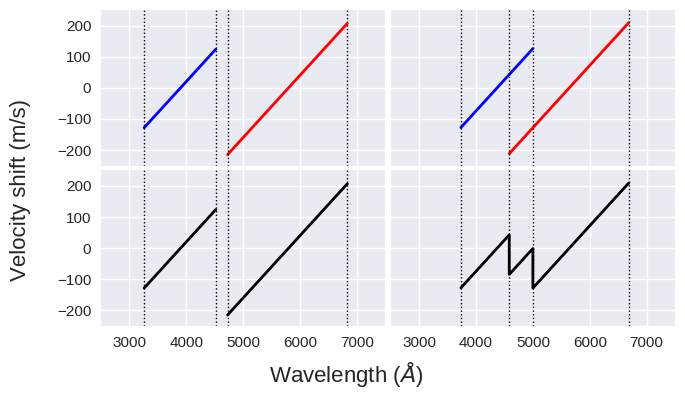

In [ ]:
import os,numpy
import matplotlib.pyplot as plt

# Use seaborn style
plt.style.use('seaborn')
# Set up settings
plt.rc('font', size=16, family='sans-serif')
plt.rc('axes', labelsize=16, linewidth=0.2)
plt.rc('legend', fontsize=16, handlelength=10)
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
plt.rc('lines', lw=0.2, mew=0.2)
# Initialise figure
s   = 0.2
fig = plt.figure(figsize=(7,4),dpi=100)
plt.subplots_adjust(left=0.15, right=0.97, bottom=0.16, top=0.95, hspace=0.03, wspace=0.02)
# Plot individual non-overlap exposure
ax  = plt.subplot(2,2,1,xlim=[2500,7500],ylim=[-250,250])
x1  = numpy.arange(3259.1,4518.8,0.1)
y1  = -s*3900+s*x1
x2  = numpy.arange(4726.9,6834.9,0.1)
y2  = -s*5800+s*x2
ax.plot(x1,y1,'blue',lw=2)
ax.plot(x2,y2,'red',lw=2)
ax.axvline(x=3259.1,ls='dotted',color='black',lw=1)
ax.axvline(x=4518.8,ls='dotted',color='black',lw=1)
ax.axvline(x=4726.9,ls='dotted',color='black',lw=1)
ax.axvline(x=6834.9,ls='dotted',color='black',lw=1)
plt.setp(ax.get_xticklabels(), visible=False)
# Plot joined non-overlap exposures
ax  = plt.subplot(2,2,3,xlim=[2500,7500],ylim=[-250,250])
x1  = numpy.arange(3259.1,4518.8,0.1)
y1  = -s*3900+s*x1
x2  = numpy.arange(4726.9,6834.9,0.1)
y2  = -s*5800+s*x2
ax.plot(x1,y1,'black',lw=2)
ax.plot(x2,y2,'black',lw=2)
ax.axvline(x=3259.1,ls='dotted',color='black',lw=1)
ax.axvline(x=4518.8,ls='dotted',color='black',lw=1)
ax.axvline(x=4726.9,ls='dotted',color='black',lw=1)
ax.axvline(x=6834.9,ls='dotted',color='black',lw=1)
# Plot individual overlapping exposures
ax  = plt.subplot(2,2,2,xlim=[2500,7500],ylim=[-250,250])
x1  = numpy.arange(3732.4,4999.4,0.1)
y1  = -s*4370+s*x1
x2  = numpy.arange(4583.5,6686.3,0.1)
y2  = -s*5640+s*x2
ax.plot(x1,y1,'blue',lw=2)
ax.plot(x2,y2,'red',lw=2)
ax.axvline(x=3732.4,ls='dotted',color='black',lw=1)
ax.axvline(x=4999.4,ls='dotted',color='black',lw=1)
ax.axvline(x=4583.5,ls='dotted',color='black',lw=1)
ax.axvline(x=6686.3,ls='dotted',color='black',lw=1)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
# Plot join overlapping exposures
ax  = plt.subplot(2,2,4,xlim=[2500,7500],ylim=[-250,250])
x   = numpy.arange(3732.4,6686.3,0.01)
y   = []
for i in x:
    if i<=4583.5:
        y.append(-s*4370+s*i)
    if 4583.5<i<4999.4:
        y.append((-s*4370+s*i-s*5640+s*i)/2)
    if 4999.4<=i:
        y.append(-s*5640+s*i)
ax.plot(x,y,'black',lw=2)
ax.axvline(x=3732.4,ls='dotted',color='black',lw=1)
ax.axvline(x=4999.4,ls='dotted',color='black',lw=1)
ax.axvline(x=4583.5,ls='dotted',color='black',lw=1)
ax.axvline(x=6686.3,ls='dotted',color='black',lw=1)
plt.setp(ax.get_yticklabels(), visible=False)
# Close figure
fig.text(0.02, 0.5, 'Velocity shift (m/s)', va='center', rotation='vertical')
fig.text(0.5, 0.02, 'Wavelength ($\AA$)', ha='center')
plt.show()

## Mapping q-coefficient

In [ ]:
import numpy
from alphaqso.vpfit import make_atom_list,atomic_info

In [ ]:
# List of transitions
atom = make_atom_list('system/model/atom.dat')
trans = numpy.array([['MgI' ,2852.9634200],
                     ['SiII',1526.7069637],
                     ['SiII',1808.0130660],
                     ['CrII',2056.2568010],
                     ['CrII',2066.1638990],
                     ['MnII',2576.8911123],
                     ['MnII',2594.5123064],
                     ['MnII',2606.4783550],
                     ['NiII',1709.6040900],
                     ['NiII',1741.5529500],
                     ['NiII',1751.9155500],
                     ['FeII',2382.7641975],
                     ['FeII',2600.1723011],
                     ['FeII',2344.2128814],
                     ['FeII',2586.6494730],
                     ['FeII',1608.4506440],
                     ['FeII',2374.4602364],
                     ['FeII',1611.2002735]],dtype=object)

In [ ]:
translist = numpy.empty((0,3),dtype=object)
for k in range(len(trans)):
    atomID = trans[k,0]+'_%02i'%trans[k,1]
    if atomID not in translist[:,0]:
        lambda0   = atomic_info(atom,atomID)[1]
        qcoef     = atomic_info(atom,atomID)[-1]
        print(atomID,lambda0,qcoef)
        translist = numpy.vstack((translist,[atomID,lambda0,qcoef]))
wave = numpy.array(translist[:,1],dtype=float)
qval = numpy.array(translist[:,2],dtype=float)

MgI_2852 2852.9595910 86
SiII_1526 1526.7069637 50
SiII_1808 1808.0097601 520
CrII_2056 2056.2568010 -1110
CrII_2066 2066.1638990 -1360
MnII_2576 2576.8563955 1420
MnII_2594 2594.4778464 1148
MnII_2606 2606.4351009 986
NiII_1709 1709.6040900 -20
NiII_1741 1741.5529500 -1400
NiII_1751 1751.9155500 -700
FeII_2382 2382.7627658 1460
FeII_2600 2600.1705053 1330
FeII_2344 2344.2114630 1210
FeII_2586 2586.6476840 1490
FeII_1608 1608.4495536 -1300
FeII_2374 2374.4584303 1590
FeII_1611 1611.1995141 1100


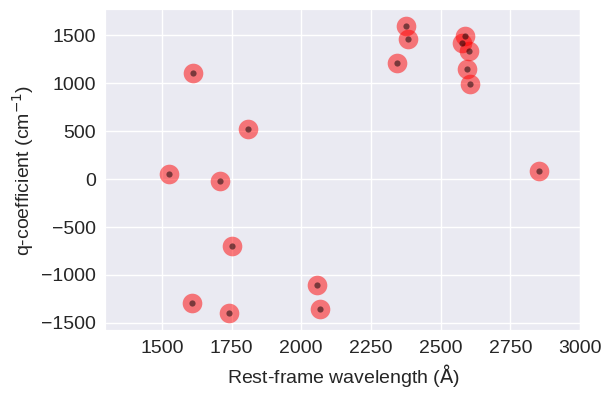

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rc('font', size=14, family='sans-serif')
plt.rc('axes', labelsize=14, linewidth=0.2)
plt.rc('legend', fontsize=14, handlelength=10)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('lines', lw=0.2, mew=0.2)
plt.figure(figsize=(6,4),dpi=100)
plt.subplots_adjust(left=0.16, right=0.95, bottom=0.15, top=0.95, hspace=0, wspace=0)
plt.subplot(111,xlim=[1300,3000])
plt.scatter(wave,qval,c='red',alpha=0.5,s=200,edgecolors='black',linewidth=0)
plt.scatter(wave,qval,c='black',alpha=0.5,s=20,edgecolors='black',linewidth=0)
plt.xlabel(r'Rest-frame wavelength ($\mathrm{\AA}$)')
plt.ylabel(r'q-coefficient (cm$^{-1}$)')
plt.show()

## Distortion pattern in J043037-485523

A distortion slope of 0.2 m/s/A will be applied to the synthetic data.

In [ ]:
import numpy
slope = 0.2
xmin,xmax = 2800,11000
ymin,ymax = -400,400
xlist = [3000,4000,5000,6000,7000,8000,9000,10000]
ylist = [-300,-200,-100,0,100,200,300]
ions  = numpy.loadtxt('system/model/turbulent.13',delimiter='\n',dtype=str)
trans = []
flag  = 0
for line in ions:
    if '*' in line and flag==1:
        break
    elif '*' in line:
        flag = 1
    else:
        trans.append((float(line.split()[2])+float(line.split()[3]))/2)

We load the list of science exposures and spectroscopy settings available.

In [ ]:
# Load list of exposures from quasar J043037-485523
uvesexp = numpy.genfromtxt('system/exposures/uvesexp.dat',names=True,dtype=object,comments='!')
# Load list of UVES spectrograph settings
uvesset = numpy.genfromtxt('system/exposures/settings.dat',names=True,dtype=object,comments='!',skip_header=4)

The distortion pattern from each exposure can be displayed as follows, with red tick marks to identify the fitting regions. The function will return the information (exposure time as well as left, central and right wavelength) for each exposure distorted pattern.

In [ ]:
def disp_trend():
    ax = plt.subplot(311,xlim=[xmin,xmax],ylim=[ymin,ymax])
    exp1 = numpy.empty((0,4))
    exp2 = numpy.empty((0,4))
    pos  = numpy.where(uvesexp['name']==b'J043037-485523')[0]
    for l in pos:
        if uvesexp['name'][l]!=b'J043037-485523':
            break
        for k in range(len(uvesset)):
            cond1 = uvesset['cent'][k]==uvesexp['cent'][l]
            cond2 = uvesset['arm'][k]==uvesexp['arm'][l]
            cond3 = uvesset['mode'][k]==uvesexp['mode'][l]
            if cond1==cond2==cond3==True:
                wbeg = 10*float(uvesset['TS_min'][k])
                cent = 10*float(uvesset['cent'][k])
                wend = 10*float(uvesset['TS_max'][k])
                time = float(uvesexp['exptime'][l])
                if cent not in [float(j) for j in exp1[:,2]]:
                    color = 'blue' if uvesexp['arm'][l]==b'BLUE' else 'red'
                    exp1 = numpy.vstack((exp1,[color,wbeg,cent,wend]))
                exp2 = numpy.vstack((exp2,[time,wbeg,cent,wend]))
                break
    for k in range (len(exp1)):
        color   = exp1[k,0]
        wastart = float(exp1[k,1])
        wacent  = float(exp1[k,2])
        waend   = float(exp1[k,3])
        x       = numpy.arange(wastart,waend,1)
        y       = slope*(x-wacent)
        ax.plot(x,y,color=color,lw=1.5,zorder=3)
        ax.scatter(wacent,0,color='black',marker='d',edgecolors='none',s=25,zorder=4)
    ax.xaxis.set_major_locator(plt.FixedLocator(xlist))
    ax.yaxis.set_major_locator(plt.FixedLocator(ylist))
    ax.text(9500,-250,'individual exposures',ha='center',va='center')
    for i in range(len(trans)):
        ax.axvline(x=trans[i],ymin=0.85,ymax=0.9,color='red',lw=1)
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.ylabel('Velocity shift (m/s)',size=15)
    return exp2

The correction function that reflects the sawtooth pattern can be produced by summing the velocity distortion from each exposure, weighted by their exposure time (`texp`).

In [ ]:
def disp_corr(exp2):
    ax = plt.subplot(312,xlim=[xmin,xmax],ylim=[ymin,ymax])
    x,y = numpy.arange(3000,10500,1),[]
    for wa in x:
        vdist,texp = [],[]
        for i in range (len(exp2)):
            if exp2[i,1] < wa < exp2[i,3]:
                vdist.append(slope*(wa-exp2[i,2]))
                texp.append(numpy.sqrt(exp2[i,0]))
        if vdist!=[]:
            y.append(sum(numpy.array(texp)*numpy.array(vdist))/sum(numpy.array(texp)))
        else:
            y.append(None)
    ax.plot(x,y,color='black',lw=1.5,zorder=1)
    ax.xaxis.set_major_locator(plt.FixedLocator(xlist))
    ax.yaxis.set_major_locator(plt.FixedLocator(ylist))
    ax.text(9500,-250,'sawtooth model',ha='center',va='center')
    for i in range(len(trans)):
        ax.axvline(x=trans[i],ymin=0.85,ymax=0.9,color='red',lw=1)
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.ylabel('Velocity shift (m/s)',size=15)

We can add a third subplot to display the simplistic distortion model assumed by Whitmore et al.

In [ ]:
def disp_simple():
    ax = plt.subplot(313,xlim=[xmin,xmax],ylim=[ymin,ymax])
    x = numpy.arange(xmin,3259.1,1)
    y = [-slope*3900+slope*3259.1 for i in range(len(x))]
    ax.plot(x,y,'black',ls='dashed',lw=1.5)
    x0 = 3900
    x = numpy.arange(3259.1,4518.8,1)
    y = slope*(x-x0)
    ax.plot(x,y,'blue',lw=1.5)
    x  = numpy.arange(4518.8,4726.9,1)
    y1 = -slope*3900 + slope*4518.8
    y2 = -slope*5800 + slope*4726.9
    a  = (y2-y1)/(4726.9-4518.8)
    b  = 4518.8 - y1/a
    y  = a*(x-b)
    ax.plot(x,y,'black',ls='dashed',lw=1.5)
    x0 = 5800
    x = numpy.arange(4726.9,6834.9,1)
    y = slope*(x-x0)
    ax.plot(x,y,'red',lw=1.5)
    x = numpy.arange(6834.9,xmax,1)
    y = [-slope*5800+slope*6834.9 for i in range(len(x))]
    ax.plot(x,y,'black',ls='dashed',lw=1.5)
    for i in range(len(trans)):
        ax.axvline(x=trans[i],ymin=0.85,ymax=0.9,color='red',lw=1) 
    ax.xaxis.set_major_locator(plt.FixedLocator(xlist))
    ax.yaxis.set_major_locator(plt.FixedLocator(ylist))
    ax.text(9500,-250,'simplistic model',ha='center',va='center')
    plt.xlabel('Wavelength ($\mathrm{\AA}$)',size=15)
    plt.ylabel('Velocity shift (m/s)',size=15)

The figure can be initialize as follows:

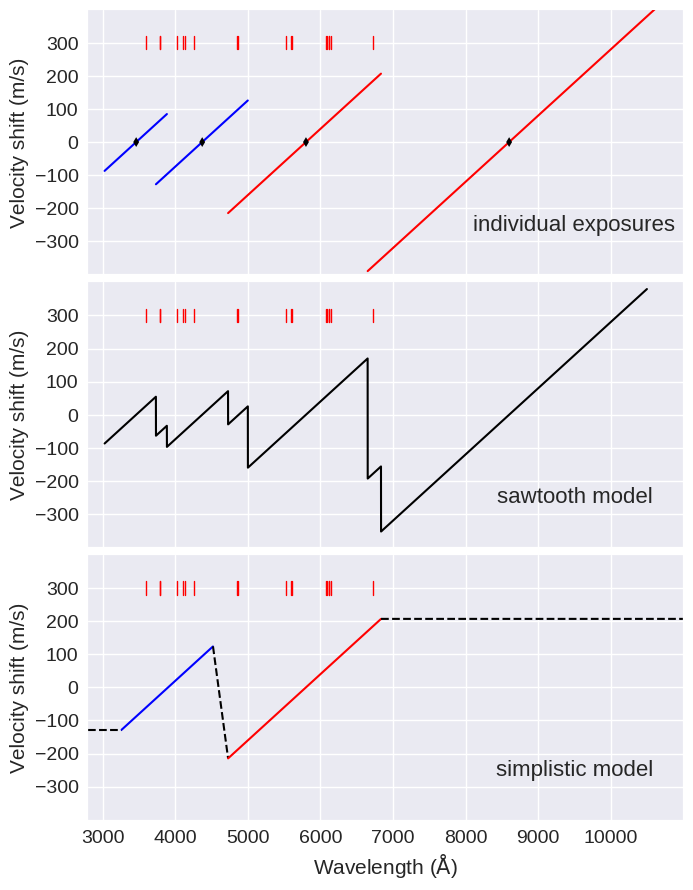

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rc('font', size=16, family='sans-serif')
plt.rc('axes', labelsize=14, linewidth=0.2)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.figure(figsize=(7,9),dpi=100)
plt.subplots_adjust(left=0.12, right=0.97, bottom=0.07, top=0.97, hspace=0.03, wspace=0)
exp2 = disp_trend()
disp_corr(exp2)
disp_simple()
plt.show()

## Create simulated spectrum

All the absorption system data can be found in the `system` folder. There, we have included a sub-directory called `reproduce` where we will execute the scripts below to create a synthetic spectrum and perform distortion calculations.

In [ ]:
import os
os.makedirs('reproduce')
os.chdir('reproduce')

The Python scripts shown in this section can be run all-in-once automatically using the `alpha` executable from the `alphaqso` package as follows:
``` none
alpha simulation --path       ../                              \
                 --qso        J043037-485523                   \
                 --instrument UVES                             \
                 --sample     SQ12                             \
                 --slope      0.2                              \
                 --snr        1000                             \
                 --vpfit      ../vpfit10.0/vpfit               \
                 --explist    ../system/exposures/uvesexp.dat  \
                 --settings   ../system/exposures/settings.dat \
                 --atom       ../system/model/atom.dat         \
                 --vpsetup    ../system/model/vp_setup.dat
```
This will execute the `create_simulated_model` method for which some input variables and modules will be needed. We import all the necessary variables here:

In [ ]:
!rm -rf reproduce

In [ ]:
path       = '../system'
qso        = 'J043037-485523'
instrument = 'UVES'
sample     = 'UV-SQ12'
slope      = 0.2
snr        = 1000
vpfit      = '../vpfit10.0/vpfit'
explist    = '../system/exposures/uvesexp.dat'
settings   = '../system/exposures/settings.dat'
atomdir    = '../system/model/atom.dat'
vpfsetup   = '../system/model/vp_setup.dat'

### Prepare fort.13 input/output models

Get absolute path for further calls:


In [ ]:
from alphaqso.utils import check_file_path
explist,settings,atomdir,vpfsetup = check_file_path([explist,settings,atomdir,vpfsetup])

Extract VPFIT information:

In [ ]:
from alphaqso.vpfit import vpfit_setup
vpfit,atom,atomdir,vpsetup,vpfsetup = vpfit_setup(vpfit,instrument,no_alpha=True,atomdir=atomdir,vpfsetup=vpfsetup)

Copy transition list, fort.18 and fort.26 files in model folder:

In [ ]:
import os
path = os.path.abspath(path)
os.system('mkdir -p model/original model/data')
os.system('cp %s/model/header.dat model/'%path)
os.system('cp %s/model/turbulent.18 model/fort.18'%path)
os.system('cp %s/model/turbulent.26 model/fort.26'%path)
os.chdir('model')

We create a `fort_fit.13` using the information in both `fort.18` and `fort.26` files:

In [ ]:
from alphaqso.forthandle import create_fit13
create_fit13('fort',simulation=True)
fort13 = open('fort_fit.13','r')
fort13 = [line.strip() for line in fort13]
os.system('rm fort*')

0

We initialize two `fort.13` files. The first is located in the `original` folder, it has no Δα/α column and will be used to generate the data chunk for each fitting region. The second `fort.13` (renamed `turbulent.13`) will contain the Δα/α column and will be used to run the model on a distorted version of the data chunks (see next section). Finally, we also initialize a `regs` 2D array that will store the wavelength edges for each region.

In [ ]:
import numpy
file1 = open('original/fort.13','w')
file2 = open('turbulent.13','w')
regs  = numpy.empty((0,2))

Loop over all the components and prepare ouput model

In [ ]:
from matplotlib import re
i,flag,ihead,idx = 0,0,0,1
while i<len(fort13):
    line = fort13[i]
    # End loop when empty line is reached
    if len(line.strip())==0:
        break
    elif '*' in line:
        file1.write(line+'\n')
        file2.write(line+'\n')
        flag += 1
    elif flag==1:
        spec = line.split()[0].split('/')[-1]
        regs = numpy.vstack((regs,[float(line.split()[2]),float(line.split()[3])]))
        head = line.replace(line.split()[0],'data/'+spec)
        file1.write(head+'\n')
        file2.write(line.replace(line.split()[0],'data/spec%02i.txt'%(idx))+'\n')
        idx += 1
        ihead += 1
    elif flag==2:
        val = line.split()
        if len(val[0])==1:
            vals = [val[0]+' '+val[1],val[2],val[3],val[4],val[5],val[6],val[7],val[8]]
        else:
            vals = [val[0],val[1],val[2],val[3],val[4],val[5],val[6],val[7]]
        comp = numpy.delete(vals,4,0)
        file1.write('   {0:<6} {1:>10} {2:>15} {3:>11} {4:>10} {5:>10} {6:>3}\n'.format(*comp))
        vals[4] = '0.000'+" ".join(re.findall("[a-zA-Z]+",vals[4][-2:]))
        file2.write('   {0:<6} {1:>10} {2:>15} {3:>11} {4:>11} {5:>10} {6:>10} {7:>3}\n'.format(*vals))
    i += 1
file1.close()
file2.close()

### Generate data chunks

We first move to the `original` folder and create a symlink to the data folder:

In [ ]:
os.chdir('original')
if os.path.exists('data'): os.system('rm data')
os.system('ln -s %s/data'%path)

0

The transition list stored in the `header.dat` file is saved into an array whose length can be used to create the input list of commands for VPFIT. Indeed, a loop over all the fitting regions needs to be done to generate all the chunks. We use the `vpfit_commands` from the `alphaqso` package to create the input command list saved in the `fitcommands` file.

In [ ]:
import numpy
from alphaqso import vpfit_commands
hdin = numpy.loadtxt('../header.dat',dtype=str,delimiter='\n')
vpfit_commands(len(hdin))

We copy the `atom.dat` from the `data` folder, create a `vp_setup.dat` setting file ensuring that no alpha column is set up. Finally, we add both files in the system environment so that VPFIT properly finds them.

In [ ]:
os.system('cp %s atom.dat'%atomdir)
numpy.savetxt('vp_setup.dat',vpsetup,fmt="%s")
os.environ['ATOMDIR']=os.path.abspath('./atom.dat')
os.environ['VPFSETUP']=os.path.abspath('./vp_setup.dat')# Run VPFIT and create chunks for original fort.13
os.system(vpfit+' < fitcommands > termout')

0

We run VPFIT and create chunks for original fort.13

In [ ]:
os.system('rm fitcommands termout')
os.system('mkdir -p chunks/')
os.system('mv vpfit_chunk* chunks/')

0

### Create synthetic distorted spectrum

We load the original spectrum of J043037-485523 and store both wavelength and error data in separate arrays.

In [ ]:
import os,numpy
from alphaqso import read_spec
shifts = numpy.empty((0,2))
os.chdir('../')
wa,fl,er = read_spec('original/data/'+spec)

Once the spectral data are loaded, we loop over all the regions, load the chunk corresponding to the region, modify error array and add noise. The synthetic spectrum is distorted to emulate true long-range distortions among exposures. The wavelength shift that will reflect the distortion is calculated for each region using the `getshift` module from the `alphaqso` package. In this work, we will distort the spectrum using a slope of 0.2 m/s/A. The flux array corresponds to the output fitted model, stored in the fourth column of the data chunks produced by VPFIT, with additional White noise added using a Gaussian distribution centered at 0 and with a standard deviation (signal-to-noise) of 1,000. The loop can then be run as follows:

In [ ]:
from alphaqso.distortion import getshift
from alphaqso.constants import *
for ireg in range(len(regs)):
    data  = numpy.loadtxt('original/chunks/vpfit_chunk%03i.txt'%(ireg+1),comments='!')
    # Initialize non-used parameters called in getshift function
    shift = float(getshift(regs[ireg,0],regs[ireg,1],slope,qso,sample,explist=explist,settings=settings))
    wmin  = data[0,0]
    wmax  = data[-1,0]
    imin1 = abs(wa-(wmin-3)).argmin()
    imin2 = abs(wa-wmin).argmin()
    imax1 = abs(wa-wmax).argmin()
    imax2 = abs(wa-(wmax+3)).argmin()
    wave  = wa[imin1:imax2+1]
    error = er[imin1:imax2+1]
    flux  = numpy.hstack(([1]*(imin2-imin1),data[:,3],[1]*(imax2-imax1)))
    ofile = open('data/spec%02i.txt'%(ireg+1),'w')
    for j in range(len(wave)):
        iwave  = wave[j]*(2*c+shift)/(2*c-shift)
        ierror = error[j] if snr==None else 1./snr
        iflux  = flux[j] if ierror<0 else flux[j]+numpy.random.normal(0,ierror)
        ofile.write('{0:>21} {1:>25} {2:>30}\n'.format('%.13f'%iwave,'%.16f'%iflux,'%.16E'%ierror))
    ofile.close()

## Distortion calculations

### Realistic model

The following script can be run automatically using the `fit_model` operation from the `alpha` executable as follows:
``` none
alpha fit --qso        J043037-485523                   \
          --instrument UVES                             \
          --sample     SQ12                             \
          --slope      0.2                              \
          --sloperange 0 0.3                            \
          --step       0.005                            \
          --fitname    sawtooth                         \
          --vpfit      ../vpfit10.0/vpfit               \
          --explist    ../system/exposures/uvesexp.dat  \
          --settings   ../system/exposures/settings.dat \
          --atomdir    ../system/model/atom.dat         \
          --vpfsetup   ../system/model/vp_setup.dat     \
          --simulation
```
This will execute the `fit_model` method for which some input variables and modules will be needed. The distortion fits will be done over a range of different distortion models. In this work, we will explore distortions ranging from a slope of 0 m/s/A to +0.3 m/s/A. The calculations will start assuming a distortion slope of 0.2 m/s/A.

In [ ]:
os.chdir('/content/2017_dumont/reproduce')

from alphaqso.fitting import fit_system
fit_system(qso        = 'J043037-485523',
           instrument = 'UVES',
           sample     = 'SQ12',
           mid_slope  = 0.2,
           sloperange = [0,0.3],
           step       = 0.005,
           test_name  = 'sawtooth',
           vpfit      = '../vpfit10.0/vpfit',
           explist    = '../system/exposures/uvesexp.dat',
           settings   = '../system/exposures/settings.dat',
           atomdir    = '../system/model/atom.dat',
           vpfsetup   = '../system/model/vp_setup.dat',
           simulation = True)

|  |  |- Fitting version: sawtooth
|  |  |- Distortion slope: p0.200
|  |  |  |- Processing turbulent fitting...
|  |  |  |- VPFIT iteration: 1
|  |  |  |  |- chisq=953.8174, ndf=988, chisq_nu=0.965
|  |  |- Distortion slope: p0.205
|  |  |  |- Processing turbulent fitting...
|  |  |  |- VPFIT iteration: 1
|  |  |  |  |- chisq=952.3156, ndf=988, chisq_nu=0.964
|  |  |- Distortion slope: p0.210
|  |  |  |- Processing turbulent fitting...
|  |  |  |- VPFIT iteration: 1
|  |  |  |  |- chisq=951.6759, ndf=988, chisq_nu=0.963
|  |  |- Distortion slope: p0.215
|  |  |  |- Processing turbulent fitting...
|  |  |  |- VPFIT iteration: 1
|  |  |  |  |- chisq=952.1031, ndf=988, chisq_nu=0.964
|  |  |- Distortion slope: p0.220
|  |  |  |- Processing turbulent fitting...
|  |  |  |- VPFIT iteration: 1
|  |  |  |  |- chisq=953.4134, ndf=988, chisq_nu=0.965
|  |  |- Distortion slope: p0.225
|  |  |  |- Processing turbulent fitting...
|  |  |  |- VPFIT iteration: 1
|  |  |  |  |- chisq=955.5801, ndf=9

#### Distortion curves

The first thing we do is to define the range of slope we want to plot, we can use the `slopelist` module from `alphaqso` for that:

In [ ]:
from alphaqso.distortion import slopelist
slope = 0
distmin = 0.0
distmax = 0.25
distsep = 0.005
distlist,distplot = slopelist(slope,distmin,distmax,distsep)

In [ ]:
from alphaqso.forthandle import get_results
import numpy

def get_distortion_results(distplot,model):
    fitres = numpy.empty((0,5))
    print('{:>7} {:>11}{:>11}{:>11}{:>11}'.format('slope','ndf','chisq','alpha','error'))
    for j in distplot:
        strslope = '0.000' if round(j,3)==0 else 'm%.3f'%abs(j) if j<0 else 'p%.3f'%abs(j)
        ther,turb,mom = get_results(turbfort='%s/%s/turbulent/turbulent.18'%(model,strslope))
        dist          = round(j,3)
        fitres        = numpy.vstack((fitres,[None]*5))
        fitres[-1,0]  = dist
        fitres[-1,1]  = turb.df
        fitres[-1,2]  = turb.chisq
        fitres[-1,3]  = turb.alpha
        fitres[-1,4]  = turb.error
        if '-' not in fitres[-1]:
            print('{:>7} {:>11}{:>11}{:>11}{:>11}'.format('%.3f'%dist,'%i'%turb.df,'%.4f'%turb.chisq,'%.4f'%turb.alpha,'%.4f'%turb.error))
        else:
            fitres = numpy.delete(fitres,-1,0)
    return fitres

In [ ]:
fitres = get_distortion_results(distplot,'sawtooth')

  slope         ndf      chisq      alpha      error
  0.000         988  1783.1122    -0.0999     0.0186
  0.005         988  1744.2279    -0.0970     0.0184
  0.010         988  1706.0388    -0.0943     0.0182
  0.015         988  1668.6625    -0.0913     0.0180
  0.020         988  1632.0982    -0.0884     0.0178
  0.025         988  1597.2240    -0.0857     0.0176
  0.030         988  1563.0234    -0.0828     0.0174
  0.035         988  1529.6776    -0.0799     0.0172
  0.040         988  1497.3346    -0.0769     0.0170
  0.045         988  1465.9043    -0.0740     0.0168
  0.050         988  1435.2428    -0.0713     0.0167
  0.055         988  1405.6934    -0.0684     0.0165
  0.060         988  1376.4212    -0.0654     0.0163
  0.065         988  1348.9589    -0.0627     0.0161
  0.070         988  1322.2371    -0.0598     0.0160
  0.075         988  1296.4138    -0.0570     0.0158
  0.080         988  1271.4043    -0.0542     0.0157
  0.085         988  1247.2469    -0.0512     

In [ ]:
from alphaqso.datafit import fit_parabola,fit_linear
import sys,os,numpy,matplotlib
import matplotlib.pyplot as plt

def plot_distortion_curve(fitres):
    plt.style.use('seaborn')
    plt.rc('font', size=12, family='sans-serif')
    plt.rc('axes', labelsize=12, linewidth=0.2)
    plt.rc('legend', fontsize=12, handlelength=10)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)
    plt.rc('lines', lw=0.2, mew=0.2)
    fig = plt.figure(figsize=(5,5),dpi=150)
    plt.subplots_adjust(left=0.15, right=0.96, bottom=0.11, top=0.95, hspace=0.05, wspace=0.2)
    x  = fitres[:,0]
    y  = fitres[:,2]
    ax = plt.subplot(211,xlim=[distmin,distmax])
    ax.errorbar(x,y,fmt='o',ms=6,markeredgecolor='none',ecolor='grey',alpha=0.7,color='black',zorder=1)
    ymin  = 0 if len(y)==0 else min(y)-1 if min(y)==max(y) else min(y)
    ymax  = 1 if len(y)==0 else max(y)+1 if min(y)==max(y) else max(y)
    slope,slope_error,m1sig,p1sig = fit_parabola(x,y,xmin=distmin,xmax=distmax)
    plt.ylim(ymin-20,ymax)
    y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
    ax.yaxis.set_major_formatter(y_formatter)
    plt.setp(ax.get_xticklabels(), visible=False)
    ax.axhline(y=0,ls='dotted',color='black')
    ax.set_ylabel('$\chi^2$',fontsize=12)
    x    = fitres[:,0]
    y    = fitres[:,3]*10
    yerr = fitres[:,4]*10
    ax   = plt.subplot(212,xlim=[distmin,distmax])
    ax.errorbar(x,y,yerr=yerr,fmt='o',ms=6,markeredgecolor='none',ecolor='grey',alpha=0.7,color='black',zorder=1)
    ymin  = -1.5
    ymax  = +0.8
    fit_linear(x,y,yerr,slope,slope_error,m1sig,p1sig,xmin=distmin,xmax=distmax,ymin=ymin,ymax=ymax)
    plt.ylim(ymin,ymax)
    ax.axhline(y=0,ls='dotted',color='black')
    y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
    ax.yaxis.set_major_formatter(y_formatter)
    ax.set_ylabel(r'$\Delta\alpha/\alpha$ (ppm)',fontsize=12)
    ax.set_xlabel(r'Distortion slope $\gamma$ (m/s/$\mathrm{\AA}$)',fontsize=12)
    plt.tight_layout()
    plt.show()

In [ ]:
plot_distortion_curve(fitres)

Slope:   0.2106+/-0.0073  
Alpha:   0.2094+/-0.1509+/-0.0401


#### Velocity plot of simulated system

The velocity plot can be done very easily using the `velplot` software. Fig. 4 of this work can be reproduce as follows, using the initial turbulent model at a distortion slope of 0.2 m/s/A:

``` none
velplot published/sawtooth/p0.200/turbulent/turbulent_ini.13
        --output profiles
        --zmid 1.3554
        --pubstyle
        --dv -60 50
        --details
        --save2pdf 2
        --seaborn
        --ncols 3
        --posidx /path/to/custom/indexes
```

The program can also be run within the notebook. The number of subplots is defined by the total number of fitting regions. However, the user can customize where to plot each region and how many columns or rows the figure should have. The position of the fitting region in the figure can be specified by defining a list of indexes where the order corresponds to the order of the regions in the input fort.13 file:

In [ ]:
idxs=[5,  # MgI  2852.9634200
      8,  # SiII 1526.7069637
     11,  # SiII 1808.0130660
     14,  # CrII 2056.2568010
     17,  # CrII 2066.1638990
      3,  # MnII 2576.8911123
      6,  # MnII 2594.5123064
      9,  # MnII 2606.4783550
     12,  # NiII 1709.6040900
     15,  # NiII 1741.5529500
     18,  # NiII 1751.9155500
      1,  # FeII 2382.7641975
      4,  # FeII 2600.1723011
      7,  # FeII 2344.2128814
     10,  # FeII 2586.6494730
     13,  # FeII 1608.4506440
     16,  # FeII 2374.4602364
      2]  # FeII 1611.2002735

In [ ]:
from velplot import make_figure
make_figure('system/published/sawtooth/p0.200/turbulent/turbulent_ini.13',
            zmid=1.3554,
            pubstyle=True,
            dv=[-60,50],
            details=True,
            seaborn=True,
            ncols=3,
            posidx=idxs,
            vpfit='vpfit10.0/vpfit')

MgI 2852.9634200 data/spec01.txt chunks/vpfit_chunk001
SiII 1526.7069637 data/spec02.txt chunks/vpfit_chunk002
SiII 1808.0130660 data/spec03.txt chunks/vpfit_chunk003
CrII 2056.2568010 data/spec04.txt chunks/vpfit_chunk004
CrII 2066.1638990 data/spec05.txt chunks/vpfit_chunk005
MnII 2576.8911123 data/spec06.txt chunks/vpfit_chunk006
MnII 2594.5123064 data/spec07.txt chunks/vpfit_chunk007
MnII 2606.4783550 data/spec08.txt chunks/vpfit_chunk008
NiII 1709.6040900 data/spec09.txt chunks/vpfit_chunk009
NiII 1741.5529500 data/spec10.txt chunks/vpfit_chunk010
NiII 1751.9155500 data/spec11.txt chunks/vpfit_chunk011
FeII 2382.7641975 data/spec12.txt chunks/vpfit_chunk012
FeII 2600.1723011 data/spec13.txt chunks/vpfit_chunk013
FeII 2344.2128814 data/spec14.txt chunks/vpfit_chunk014
FeII 2586.6494730 data/spec15.txt chunks/vpfit_chunk015
FeII 1608.4506440 data/spec16.txt chunks/vpfit_chunk016
FeII 2374.4602364 data/spec17.txt chunks/vpfit_chunk017
FeII 1611.2002735 data/spec18.txt chunks/vpfit_ch

### Whitmore model

In [ ]:
os.chdir('/content/2017_dumont/reproduce')

from alphaqso.fitting import fit_system
fit_system(qso        = 'J043037-485523',
           instrument = 'UVES',
           sample     = 'SQ12',
           mid_slope  = 0.2,
           sloperange = [0,0.3],
           step       = 0.005,
           test_name  = 'simplistic',
           vpfit      = '../vpfit10.0/vpfit',
           explist    = '../system/exposures/uvesexp.dat',
           settings   = '../system/exposures/settings.dat',
           atomdir    = '../system/model/atom.dat',
           vpfsetup   = '../system/model/vp_setup.dat',
           simulation = True,
           whitmore   = True)

|  |  |- Fitting version: simplistic
|  |  |- Distortion slope: p0.200
|  |  |  |- Processing turbulent fitting...
|  |  |  |- VPFIT iteration: 1
|  |  |  |  |- chisq=1577.3317, ndf=988, chisq_nu=1.596
|  |  |- Distortion slope: p0.205
|  |  |  |- Processing turbulent fitting...
|  |  |  |- VPFIT iteration: 1
|  |  |  |  |- chisq=1594.6025, ndf=988, chisq_nu=1.614
|  |  |- Distortion slope: p0.210
|  |  |  |- Processing turbulent fitting...
|  |  |  |- VPFIT iteration: 1
|  |  |  |  |- chisq=1612.8690, ndf=988, chisq_nu=1.632
|  |  |- Distortion slope: p0.215
|  |  |  |- Processing turbulent fitting...
|  |  |  |- VPFIT iteration: 1
|  |  |  |  |- chisq=1632.3734, ndf=988, chisq_nu=1.652
|  |  |- Distortion slope: p0.220
|  |  |  |- Processing turbulent fitting...
|  |  |  |- VPFIT iteration: 1
|  |  |  |  |- chisq=1653.2211, ndf=988, chisq_nu=1.673
|  |  |- Distortion slope: p0.225
|  |  |  |- Processing turbulent fitting...
|  |  |  |- VPFIT iteration: 1
|  |  |  |  |- chisq=1674.658

#### Distortion curves

In [ ]:
fitres = get_distortion_results(distplot,'simplistic')

  slope         ndf      chisq      alpha      error
  0.000         988  1783.1122    -0.0999     0.0186
  0.005         988  1756.7132    -0.0977     0.0184
  0.010         988  1731.1826    -0.0960     0.0183
  0.015         988  1706.5542    -0.0938     0.0182
  0.020         988  1682.9417    -0.0919     0.0180
  0.025         988  1661.1973    -0.0899     0.0179
  0.030         988  1640.3005    -0.0879     0.0178
  0.035         988  1620.4716    -0.0860     0.0177
  0.040         988  1601.6495    -0.0837     0.0176
  0.045         988  1584.0378    -0.0818     0.0175
  0.050         988  1567.2291    -0.0798     0.0174
  0.055         988  1551.8032    -0.0779     0.0173
  0.060         988  1536.7483    -0.0756     0.0172
  0.065         988  1523.7698    -0.0739     0.0172
  0.070         988  1511.5548    -0.0717     0.0171
  0.075         988  1500.3906    -0.0696     0.0170
  0.080         988  1490.2825    -0.0678     0.0170
  0.085         988  1481.2124    -0.0655     

Slope:   0.1235+/-0.0068  
Alpha:  -0.4986+/-0.1740+/-0.0243


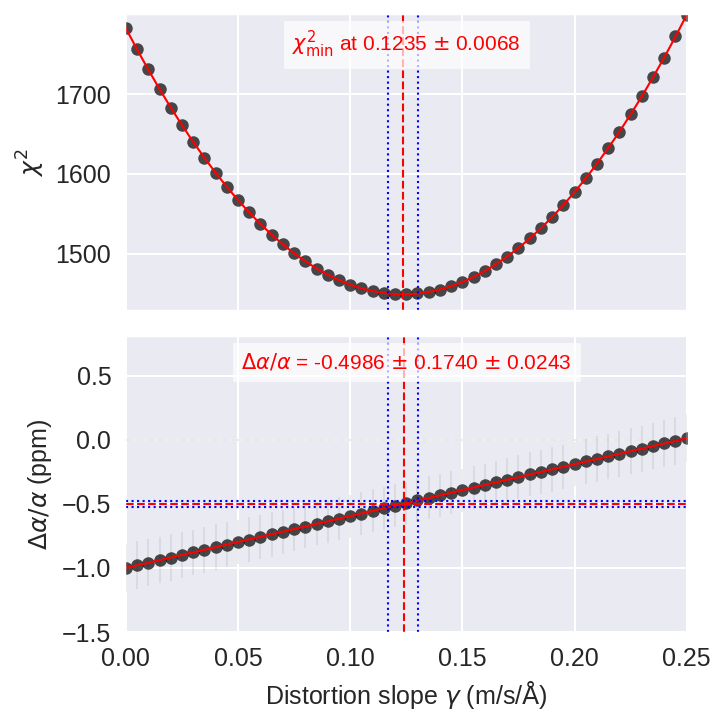

In [ ]:
plot_distortion_curve(fitres)